#Female-birth Analysis


# Install th Facebook Prophet

In [ ]:
#Installing prophet
#%%capture
!pip install prophet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the data from google drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/resources/daily-total-female-births-CA.csv')
display(df.head())
display(df.tail())

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


<AxesSubplot:>

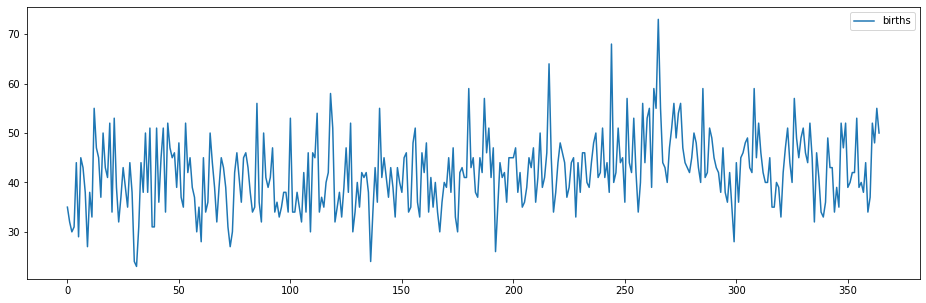

In [ ]:
#Plotting the line chart
df.plot(figsize=(16,5))

In [ ]:
#Renaming the columns acc to the libaray req

df.columns = ['ds','y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
#converting the ds column into date time format

df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
#to have a look at all the functions available inside the prophet library

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [ ]:
# Initialize the Model

model=Prophet()

In [ ]:
#Dropping the nulls if any

df.dropna(axis=0,inplace=True)

In [ ]:
display(df)

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [ ]:
#Fitting the model
model.fit(df)

Exception: ignored

In [ ]:
df.tail()

,ds,y
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [ ]:
### Create future dates of 365 days

future_dates=model.make_future_dataframe(periods=365)

In [ ]:
display(future_dates)

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
725,1960-12-26
726,1960-12-27
727,1960-12-28
728,1960-12-29


In [ ]:
#Making the Prediction

prediction=model.predict(future_dates)

In [ ]:
# Displaying the Prediction
display(prediction)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-01-01,38.141697,30.738700,47.959099,38.141697,38.141697,1.107229,1.107229,1.107229,1.107229,1.107229,1.107229,0.0,0.0,0.0,39.248926
1,1959-01-02,38.164123,29.304063,46.990539,38.164123,38.164123,0.026535,0.026535,0.026535,0.026535,0.026535,0.026535,0.0,0.0,0.0,38.190658
2,1959-01-03,38.186549,28.829319,46.351517,38.186549,38.186549,-0.760432,-0.760432,-0.760432,-0.760432,-0.760432,-0.760432,0.0,0.0,0.0,37.426117
3,1959-01-04,38.208976,26.287628,44.166363,38.208976,38.208976,-3.085501,-3.085501,-3.085501,-3.085501,-3.085501,-3.085501,0.0,0.0,0.0,35.123474
4,1959-01-05,38.231402,28.855597,46.465689,38.231402,38.231402,-0.853634,-0.853634,-0.853634,-0.853634,-0.853634,-0.853634,0.0,0.0,0.0,37.377768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1960-12-26,46.843228,37.419331,54.952139,45.571453,48.003277,-0.853634,-0.853634,-0.853634,-0.853634,-0.853634,-0.853634,0.0,0.0,0.0,45.989595
726,1960-12-27,46.849364,39.799603,57.170033,45.573205,48.010467,1.743660,1.743660,1.743660,1.743660,1.743660,1.743660,0.0,0.0,0.0,48.593024
727,1960-12-28,46.855500,40.773520,57.463297,45.571895,48.019073,1.822143,1.822143,1.822143,1.822143,1.822143,1.822143,0.0,0.0,0.0,48.677642
728,1960-12-29,46.861635,39.294325,56.576516,45.570422,48.027586,1.107229,1.107229,1.107229,1.107229,1.107229,1.107229,0.0,0.0,0.0,47.968864


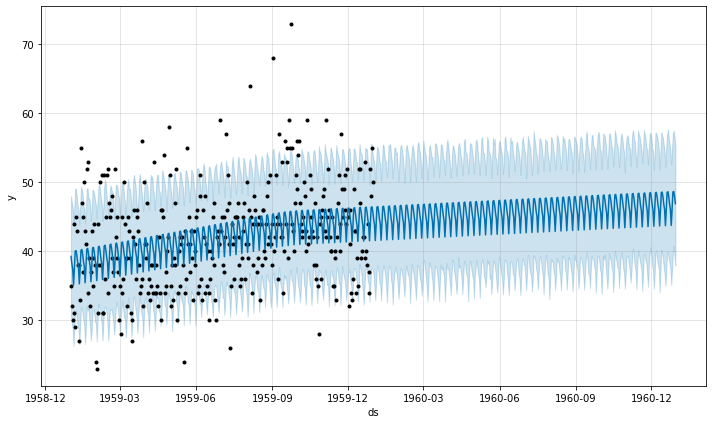

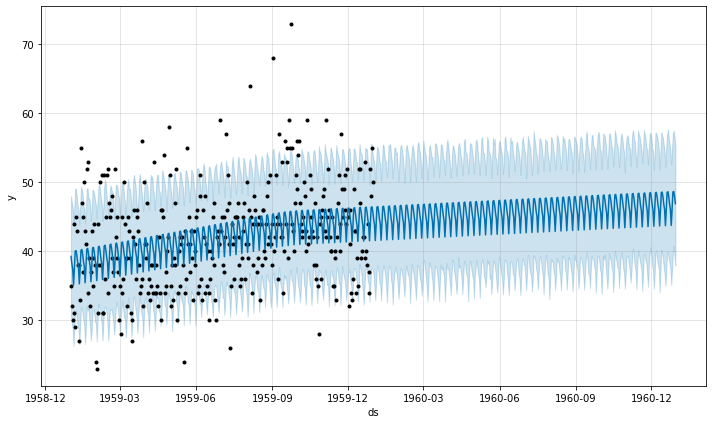

In [ ]:
### plot the predicted projection
model.plot(prediction)

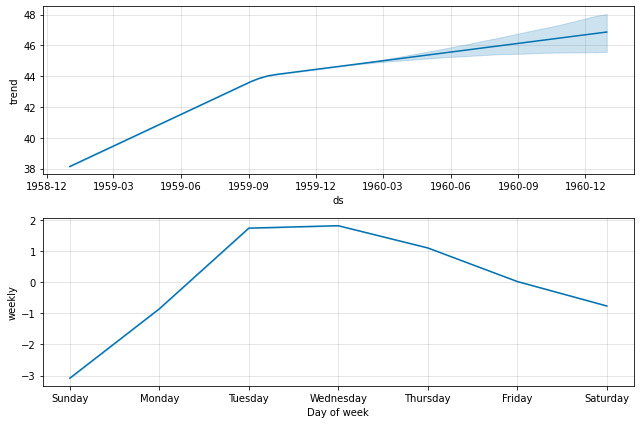

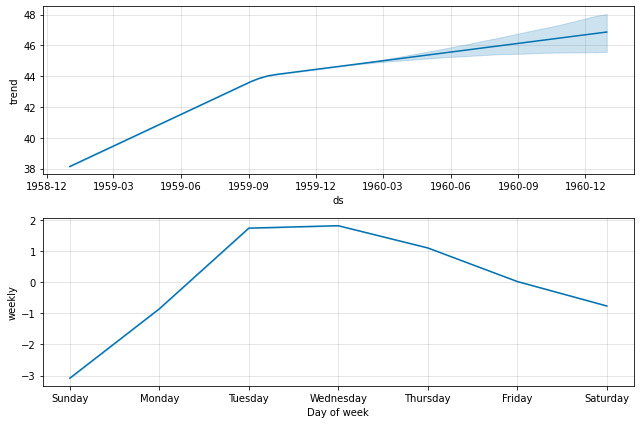

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)